In [1]:
# import sys
# sys.path.extend(['D:\\cppn-tensorflow-master\\cppn-tensorflow-master',
#                  'D:/cppn-tensorflow-master/cppn-tensorflow-master'])
# import os
# 
# os.chdir('D:\\cppn-tensorflow-master\\cppn-tensorflow-master')

%run -i sampler.py
i = 0

In [152]:
if i>0:
    sampler.cppn.close()
    tf.reset_default_graph()
# net_size = [64, 1]
# 6, 8, 8, 8]  ## must have as many elements as num_layers
# net_size = net_size[::-1]
# net_size = [32, 32, 16, 8, 4, 3]
# net_size = [32, 32, 32, 16, 4, 4]
# net_size = [32, 32, 32, 32, 32, 24, 16, 8, 4]

# net_size = [32, 32]
# net_size = np.tile(net_size, 5)

# net_size = [256, 256, 128, 64, 32, 16, 16, 8, 8, 4, 4, 3, 3, 9]
# net_size = [256, 64, 128, 32, 16, 8, 2]

# net_size = [128, 32, 32, 4, 4]  # (makes good pictures with tanh(x^5)
# net_size = [32, 128, 32, 4]
# net_size = np.multiply([32, 512, 64, 32, 32, 8], 0.5)
# net_size = [256, 32, 32, 32, 8, 4]  # (makes good pictures with tanh(x^5)
# net_size = [128, 32, 32, 32, 32, 16, 8, 4]

# net_size = np.concatenate((np.tile([64, 32], 5), [6, 3]))
# a = 25
# b = 15
# c = 10
# d = 5
# net_size = np.tile([a, b], 2)
# net_size = np.append(net_size, [100])
# net_size = np.append(net_size, np.tile([c, d], 2))
# net_size = np.concatenate(([64], net_size))
# a = 16
# b = 8
# c = [a, b]
# net_size = [256, 128] + c + [128, 64] + c + [32, 16] + [4, 4]
# net_size = [128, 128, 128, 12, 12, 12, 12, 12, 12, 6, 6]

# total_neurons = 500
# num_layers = 20
# w = 0.5
# net_size = []
# for i in range(1, 20):
#     n = 500 / (i ** w) + 20*np.sin(i)**2 + 3
#     # n = i ** w + np.cos(i) + 3
#     # n = np.log10(i)
#     net_size.append(np.round(n))
# net_size = net_size / (np.sum(net_size) / total_neurons)
# net_size = [int(np.round(x)) for x in net_size]
# print(net_size)
seed = 12345678
np.random.seed(seed=seed)

total_neurons = 200
num_layers = 5
omega =  3
alpha = 2
mu = -0.1

# a = 30
# net_size = [100, a, a, a, a, a, a]
# net_size = [20, a, a, 300, 3]
# net_size = np.append(net_size, [4])
# net_size = [i**2 for i in range(3,11)]
# net_size = np.append(net_size, [10, 5])
# net_size = [3,30, 300, 30, 3]
# net_size = np.tile(15, 10)
# net_size = [40, 30, 20, 20, 10]
# net_size = np.tile(100, 5)
net_size = [128, 128, 3]

print(net_size)

num_layers = len(net_size)
c_dim = 3
img_null = np.zeros((1080, 1080))
# img_null = None
sampler = Sampler(z_dim = 16, scale = 8, net_size = net_size, 
                  num_layers=num_layers, c_dim=c_dim, seed=seed, img=img_null)
i = 1
mgc = get_ipython().magic
mgc(u'matplotlib inline')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
i_r = 0

[128, 128, 3]
Input image is not the same dims as x_mat/y_mat. Cropping input.


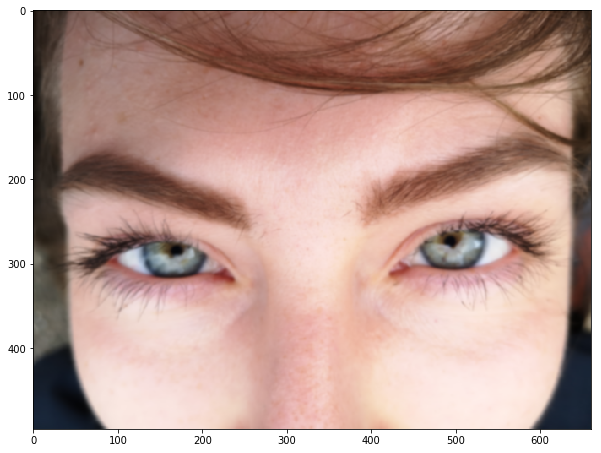

In [3]:
import scipy.ndimage
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/anna_square.jpeg'
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Georg_2018.jpg'
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/mom.jpeg'
# im1 = Image.open(img_path).convert('L')
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Jogi.jpg'
img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Bella.jpg'
im1 = Image.open(img_path)


width = int(3968/6)
height = int(2976/6)
width_hires = 3968
height_hires = 2976

im2 = im1.resize((width, height), Image.ANTIALIAS).rotate(180)
# im2_hires = im1.resize((width_hires, height_hires), Image.ANTIALIAS).rotate(180)
im2_hires = im1.rotate(180)

mu = 1
sigma = np.array([mu, mu, 0])
sigma_hires = sigma*3
im2 = scipy.ndimage.filters.gaussian_filter(im2, sigma)
im2_hires = scipy.ndimage.filters.gaussian_filter(im2_hires, sigma_hires)
# im2 = np.array(im2)

plt.imshow(im2)


[-0.00370869  0.00702805  0.00793404 -0.01145623  0.02153108 -0.02485664
  0.03807355  0.04253173  0.04740634 -0.04801949 -0.04819145  0.06590073
  0.07183061  0.08188456  0.12778194  0.17166008]


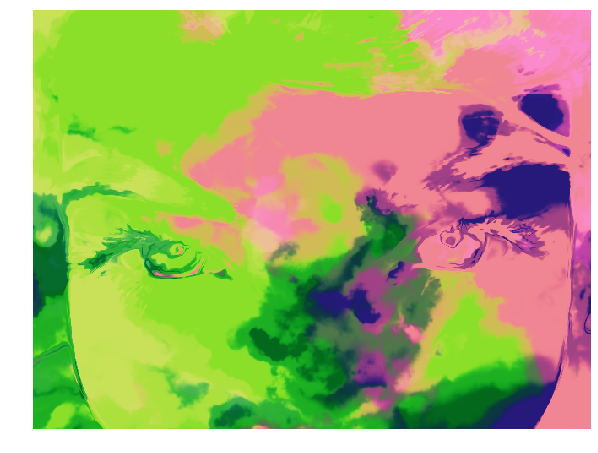

In [210]:
# sampler.reinit()  

##################
x_dim = width
y_dim = height
scale = 4

z2 = sampler.generate_z()[0]
z_scale = 0.1
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor 
print(zz)
##################

##################
# pseed = 0
pseed = int(np.random.random() * 1e5 )
perlin_params = (5, scale/2, 6, 0.5, 2.0)
f_params = [1, 1, perlin_params, 0, -0.02]
methods = ['rgb', 'hsv', 'xyz', 'yuv', 'YPbPr', 'YCbCr', 'YDbDr']
method_i = 0
#################

img_data = sampler.generate(zz , x_dim=x_dim, y_dim=y_dim, scale=scale, seed=pseed,
                            f_params=f_params, img=im2)


sampler.show_image(img_data, methods[method_i])



In [ ]:
fig, ax = plt.subplots()
ax.hist(img_data[:, :, 0].reshape(-1), 100, alpha=0.2)
ax.hist(img_data[:, :, 1].reshape(-1), 100, alpha=0.2)
ax.hist(img_data[:, :, 2].reshape(-1), 100, alpha=0.2)

In [ ]:
sampler.reinit()  
i_r = 0
##################
x_dim = 512
y_dim = 512
scale = 1
if i_r == 0:
    img = np.zeros((x_dim, y_dim))
#     img = im2
#     x, y = np.meshgrid(np.linspace(-scale, scale, x_dim), np.linspace(-scale, scale, y_dim))
#     img = np.random.random()*x + np.random.random()*y + np.random.random()*np.sqrt(x**2 + y**2)
#     img = np.random.random((x_dim, y_dim))
mu = 1  # image evolution rate
##################

z2 = sampler.generate_z()[0]
z_scale = 0
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor 
print(zz)
##################

##################
pseed = 0
# pseed = int(np.random.random() * 1e5 )
perlin_params = (5, 1, 6, 0.5, 2.0)
f_params = [1, 0, perlin_params, 0, mu]
methods = ['rgb', 'hsv', 'xyz', 'yuv', 'YPbPr', 'YCbCr', 'YDbDr']
method_i = 0
##################

img_data = sampler.generate(zz, x_dim=512, y_dim=512, scale=scale, seed=pseed,
                            f_params=f_params, img=img)
# img = img + mu * np.mean(img_data, axis=2).reshape(512, 512)
img = (img + np.mean(img_data, axis=2).reshape(512, 512)) / 2
i_r += 1

sampler.show_image(img_data, methods[method_i])
plt.imshow(img)
plt.colorbar()
img.max()

In [ ]:
x, y = np.meshgrid(np.linspace(-scale, scale, x_dim), np.linspace(-scale, scale, y_dim))
img = np.random.random()*x + np.random.random()*y + np.random.random()*np.sqrt(x**2 + y**2)
mu = 0.05
sampler.save_recursive_anim_png_seq(zz, img, img_evo=mu, n_frame=100, 
                            x_dim=x_dim, y_dim=y_dim, scale=scale, f_params=f_params)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)


z2 = sampler.generate_z()[0]
img = None
z_scale = 0
z_factor = np.random.normal(size=16) * z_scale
sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))
z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor    # 
f_params = [5, 0, 0, 0, 0]

for ax in axes.flat:
    sampler.reinit()
    img_data = sampler.generate(zz, x_dim = 512, y_dim = 512, scale = 0.01,
                                f_params=f_params, img=img)
    
    ax.set_aspect('equal')
    ax.imshow(img_data)
#     fig.patch.set_visible(False)
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
# z2 = [0, 0, 0.1, 0.1, 0, 0, 0, 0]
z3 = sampler.generate_z()
img = None

low = np.random.random()
mid = np.random.random()
high = np.random.random()

C = np.random.uniform()
zz2 = np.concatenate((C + low * z3[0:4], mid * z3[4:12], high * z3[12:16]))
# f_params = [2, 0.2, 0, 0, 0]

img_data = sampler.generate(zz2, x_dim = 512, y_dim = 512, scale = 10, 
                            f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)

Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 


Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 


Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 


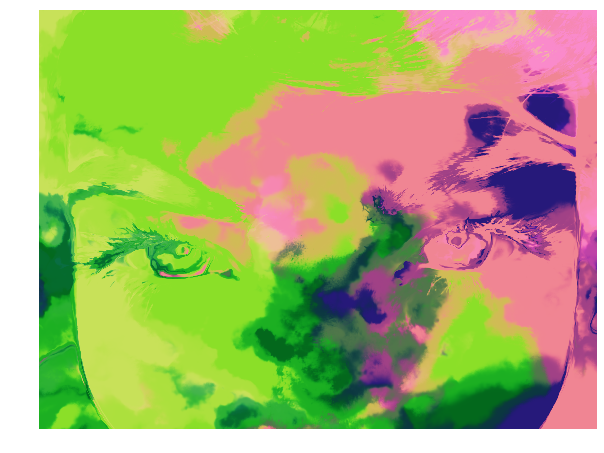

In [211]:
img_data = sampler.generate_hires([zz], res=124, x_res_factor=int(width_hires/124), y_res_factor=int(height_hires/124), 
                                  seed=pseed, scale=scale, f_params=f_params, img=im2_hires)
sampler.show_image(img_data)
# plt.imshow(img_data)
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/hi_res/'
if not path.exists(folder):
    makedirs(folder)
figname = folder + time + '.png'
# sampler.save_png(img_data, figname)
# img_data = rgba2rgb(img_data)
# img_data = hsv2rgb(img_data)
# img_data = xyz2rgb(img_data)
imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')

In [ ]:
sampler.save_hires_png_seq([zz], 0.07, n_frame=300, res=80, x_res_factor=16, y_res_factor=9,
                           scale=1, seed=pseed, f_params=f_params, img=None, method='rgb')

In [ ]:
x = sampler.generate(z1, x_dim=512, y_dim=512)
import matplotlib.pyplot as plt
plt.hist(x.reshape(1, x.size))

In [ ]:
# z1 = sampler.generate_z()
z2 = sampler.generate_z()
img_data = sampler.generate(z2, x_dim=640, y_dim=640, scale=10, 
                                    f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)



In [ ]:
sampler.show_image(sampler.generate(z1, x_dim=1080, y_dim=1080, f_params=f_params))

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
z1 = np.array(z1)
z2 = np.array(z2)
sampler.save_anim_gif(z1, z2, figname, 
                      x_dim = 640, y_dim = 640, scale=5, f_params=f_params, 
                      n_frame=240, reverse=False, img=img)

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.025, figname, 
                      x_dim = 640, y_dim = 640, scale=10, f_params=f_params, 
                      n_frame=240, reverse=False, img=None)

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.01, figname, 
                      x_dim = 640, y_dim = 640, scale=0.1, f_params=f_params, 
                      n_frame=680, reverse=False, img=None, method='rgba')

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_cat_anim_gif(z1=zz[0], r_global=0.1, filename=figname, 
                      x_dim = 640, y_dim = 640, scale=1.5, f_params=f_params, 
                      n_frame=360, reverse=False, img=None)

In [ ]:
audiopath = 'media/muy-tranquilo-short3.mp3'
acceleration = False
exp_gain = 2.5
w_scaler = 1
f_amp_w = True
normalize_w = False

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
sampler.save_music_anim_gif(zz, r_global=0.015, audiopath=audiopath, filename=figname,
                            x_dim = 640, y_dim = 640, scale=1, f_params=f_params,
                            n_frame=322, img=None,
                            acceleration=acceleration, 
                            exp_gain=exp_gain, w_scaler=w_scaler,
                            normalize_w=normalize_w, 
                            f_amp_w=f_amp_w)

In [ ]:
audiopath = 'media/muy-tranquilo-short3.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
amp = sampler.smooth_amps(amp, a=0.9)
# amp_sums = np.sum(amp, 0)
# amp = (amp) / amp_sums  # normalize to add to 2*pi for each band so gif loops
# freq = [1, 2, 3, 4, 5, 7, 10, 12]
# rand_freq1 = sample(freq, len(freq))
# # rand_freq1 = sample(freq, len(freq))
# amp = rand_freq1 * np.tile(2 * np.pi, amp.shape[1]) * amp

In [ ]:
amp.shape

In [ ]:
audiopath = 'high.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
theta1,theta2 = sampler.calculate_force_thetas(amp)

r1, r2 = 1, 1
delta_z1 = r1 * np.sin(theta1) - r1/2
delta_z2 = r2 * np.cos(theta2) - r2/2

plt.plot(np.diff(theta1, 0))

In [ ]:
from os import path, makedirs
z_zoom = zz
num_frames = 540
res = 512
r_global = 0.005
w_scaler = 1
exp_gain = 1
acceleration = False
audiopath = 'mozart25_short.mp3'

start_scale = 0.5
end_scale = 10

def calculate_delta_z(sampler, z1, r_global, audiopath, n_frame=10, 
                      start_scale, end_scale,
                      acceleration=False, exp_gain=1, fps=30, w_scaler=2):
    total_frames = n_frame
    fps = fps
    sound, fs = sampler.load_sound(audiopath)
    amp = sampler.generate_amp(sound, fs, fps)[0:total_frames]

    z1 = z1[0]
    r = z1 / np.max(np.abs(z1))
    r = r * r_global

    #  CALCULATE delta_z
    if acceleration:
        gamma = 20  # damping constant
        thresh = 20  # threshold audio
        num_pad = 3  #  number of padding elements (zeros) to re-align delta_theta with beats

        theta1, theta2 = sampler.calculate_force_thetas(amp=amp, exp_gain=exp_gain, gamma=gamma, w_scaler=w_scaler,
                                                        num_pad=num_pad, thresh=thresh)
        total_frames += num_pad
    else:
        theta1, theta2 = sampler.calculate_thetas(amp=amp, exp_gain=exp_gain, w_scaler=w_scaler)

    delta_z1 = np.sin(theta1)
    delta_z2 = np.cos(theta2)
    
    scale = 10 ** \
        (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new)

    delta_z = []
    for i in range(delta_z1.shape[0]):
        delta_z.append(np.stack([x for t in zip(delta_z1[i, :], delta_z2[i, :]) for x in t]))
    delta_z = np.stack(delta_z)
    delta_z = np.multiply(r, delta_z) - r / 2
    delta_z = np.multiply(delta_z, scale)

    return delta_z

delta_z = calculate_delta_z(sampler=sampler, z1=z_zoom, r_global=r_global, 
                            audiopath=audiopath, n_frames=num_frames, 
                            start_scale=start_scale, end_scale=end_scale)
# delta_z = sampler.calculate_delta_z(z_zoom, r_global, audiopath, num_frames)

num_frames_new = delta_z.shape[0]
# scale = 10 ** \
#         (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new))

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/zoom_anim/' + time
if not path.exists(time):
    makedirs(folder)

for i in range(num_frames_new):
    z_new = z_zoom + delta_z[i, :]

    img_data = sampler.generate(z_new, x_dim=res, y_dim=res, scale=scale[i],
                                f_params=f_params, img=img)
    print('processing image ', i)

    figname = folder + '/' + time + '-' + str(i).zfill(4) + '.png'
    imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')


In [ ]:
from os import path, makedirs
num_frames = 500
scale = 2 * 10 ** (np.linspace(-1, 1, num_frames))

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/zoom_anim/' + time
if not path.exists(time):
    makedirs(folder)

for i in range(num_frames):

    img_data = sampler.generate(zz, x_dim = 1280, y_dim = 1280, scale = scale[i],
                                f_params=f_params, img=img)
    figname = folder + '/' + time + '-' + str(i).zfill(4) + '.png'
    
    sampler.save_png(img_data, figname)

In [ ]:
# import scipy.ndimage
img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/anna_square.jpeg'
im1 = Image.open(img_path).convert('L')


width = 512
height = 512

im2 = im1.resize((width, height), Image.ANTIALIAS) 

im2 = scipy.ndimage.filters.gaussian_filter(im2, 5)


plt.imshow(im2, cmap='gray')
